In [ ]:
! pip install polars

In [ ]:
import polars as pl
import datetime as dt

df = pl.DataFrame(
    {
        "name": ["Alice Archer", "Ben Brown", "Chloe Cooper", "Daniel Donovan"],
        "birthdate": [
            dt.date(1997, 1, 10),
            dt.date(1985, 2, 15),
            dt.date(1983, 3, 22),
            dt.date(1981, 4, 30),
        ],
        "weight": [57.9, 72.5, 53.6, 83.1],  # (kg)
        "height": [1.56, 1.77, 1.65, 1.75],  # (m)
    }
)

print(df)

shape: (4, 4)
┌────────────────┬────────────┬────────┬────────┐
│ name           ┆ birthdate  ┆ weight ┆ height │
│ ---            ┆ ---        ┆ ---    ┆ ---    │
│ str            ┆ date       ┆ f64    ┆ f64    │
╞════════════════╪════════════╪════════╪════════╡
│ Alice Archer   ┆ 1997-01-10 ┆ 57.9   ┆ 1.56   │
│ Ben Brown      ┆ 1985-02-15 ┆ 72.5   ┆ 1.77   │
│ Chloe Cooper   ┆ 1983-03-22 ┆ 53.6   ┆ 1.65   │
│ Daniel Donovan ┆ 1981-04-30 ┆ 83.1   ┆ 1.75   │
└────────────────┴────────────┴────────┴────────┘


In [ ]:
import os

PATH = "/content/"
output_filepath = PATH + "docs/assets/data/output.csv"
os.makedirs(os.path.dirname(output_filepath), exist_ok=True)
df.write_csv(output_filepath)

df_csv = pl.read_csv(output_filepath, try_parse_dates=True)
print(df_csv)

shape: (4, 4)
┌────────────────┬────────────┬────────┬────────┐
│ name           ┆ birthdate  ┆ weight ┆ height │
│ ---            ┆ ---        ┆ ---    ┆ ---    │
│ str            ┆ date       ┆ f64    ┆ f64    │
╞════════════════╪════════════╪════════╪════════╡
│ Alice Archer   ┆ 1997-01-10 ┆ 57.9   ┆ 1.56   │
│ Ben Brown      ┆ 1985-02-15 ┆ 72.5   ┆ 1.77   │
│ Chloe Cooper   ┆ 1983-03-22 ┆ 53.6   ┆ 1.65   │
│ Daniel Donovan ┆ 1981-04-30 ┆ 83.1   ┆ 1.75   │
└────────────────┴────────────┴────────┴────────┘


In [ ]:
a = pl.col("weight") / (pl.col("height") ** 2)
print(a)

[(col("weight")) / (col("height").pow([dyn int: 2]))]


In [ ]:
result = df.select(
    pl.col("name"),
    pl.col("birthdate").dt.year().alias("birth_year"),
    (pl.col("weight") / (pl.col("height") ** 2)).alias("bmi"),
)
print(result)

shape: (4, 3)
┌────────────────┬────────────┬───────────┐
│ name           ┆ birth_year ┆ bmi       │
│ ---            ┆ ---        ┆ ---       │
│ str            ┆ i32        ┆ f64       │
╞════════════════╪════════════╪═══════════╡
│ Alice Archer   ┆ 1997       ┆ 23.791913 │
│ Ben Brown      ┆ 1985       ┆ 23.141498 │
│ Chloe Cooper   ┆ 1983       ┆ 19.687787 │
│ Daniel Donovan ┆ 1981       ┆ 27.134694 │
└────────────────┴────────────┴───────────┘


In [ ]:
result = df.select(
    pl.col("name"),
    (pl.col("weight", "height") * 0.95).round(2).name.suffix("-5%"),
)
print(result)

shape: (4, 3)
┌────────────────┬───────────┬───────────┐
│ name           ┆ weight-5% ┆ height-5% │
│ ---            ┆ ---       ┆ ---       │
│ str            ┆ f64       ┆ f64       │
╞════════════════╪═══════════╪═══════════╡
│ Alice Archer   ┆ 55.0      ┆ 1.48      │
│ Ben Brown      ┆ 68.88     ┆ 1.68      │
│ Chloe Cooper   ┆ 50.92     ┆ 1.57      │
│ Daniel Donovan ┆ 78.94     ┆ 1.66      │
└────────────────┴───────────┴───────────┘


In [ ]:
result = df.with_columns(
    birth_year=pl.col("birthdate").dt.year(),
    bmi=pl.col("weight") / (pl.col("height") ** 2),
)
print(result)

shape: (4, 6)
┌────────────────┬────────────┬────────┬────────┬────────────┬───────────┐
│ name           ┆ birthdate  ┆ weight ┆ height ┆ birth_year ┆ bmi       │
│ ---            ┆ ---        ┆ ---    ┆ ---    ┆ ---        ┆ ---       │
│ str            ┆ date       ┆ f64    ┆ f64    ┆ i32        ┆ f64       │
╞════════════════╪════════════╪════════╪════════╪════════════╪═══════════╡
│ Alice Archer   ┆ 1997-01-10 ┆ 57.9   ┆ 1.56   ┆ 1997       ┆ 23.791913 │
│ Ben Brown      ┆ 1985-02-15 ┆ 72.5   ┆ 1.77   ┆ 1985       ┆ 23.141498 │
│ Chloe Cooper   ┆ 1983-03-22 ┆ 53.6   ┆ 1.65   ┆ 1983       ┆ 19.687787 │
│ Daniel Donovan ┆ 1981-04-30 ┆ 83.1   ┆ 1.75   ┆ 1981       ┆ 27.134694 │
└────────────────┴────────────┴────────┴────────┴────────────┴───────────┘


In [ ]:
# create second df with subset of the rows
result = df.filter(pl.col("birthdate").dt.year() < 1990)
print(result)

shape: (3, 4)
┌────────────────┬────────────┬────────┬────────┐
│ name           ┆ birthdate  ┆ weight ┆ height │
│ ---            ┆ ---        ┆ ---    ┆ ---    │
│ str            ┆ date       ┆ f64    ┆ f64    │
╞════════════════╪════════════╪════════╪════════╡
│ Ben Brown      ┆ 1985-02-15 ┆ 72.5   ┆ 1.77   │
│ Chloe Cooper   ┆ 1983-03-22 ┆ 53.6   ┆ 1.65   │
│ Daniel Donovan ┆ 1981-04-30 ┆ 83.1   ┆ 1.75   │
└────────────────┴────────────┴────────┴────────┘


In [ ]:
result = df.filter(
    pl.col("birthdate").is_between(dt.date(1982, 12, 31), dt.date(1996, 1, 1)),
    pl.col("height") > 1.7,
)
print(result)

shape: (1, 4)
┌───────────┬────────────┬────────┬────────┐
│ name      ┆ birthdate  ┆ weight ┆ height │
│ ---       ┆ ---        ┆ ---    ┆ ---    │
│ str       ┆ date       ┆ f64    ┆ f64    │
╞═══════════╪════════════╪════════╪════════╡
│ Ben Brown ┆ 1985-02-15 ┆ 72.5   ┆ 1.77   │
└───────────┴────────────┴────────┴────────┘


In [ ]:
result = df.group_by(
    (pl.col("birthdate").dt.year() // 10 * 10).alias("decade"),
    maintain_order=True,
).len()
print(result)

shape: (2, 2)
┌────────┬─────┐
│ decade ┆ len │
│ ---    ┆ --- │
│ i32    ┆ u32 │
╞════════╪═════╡
│ 1990   ┆ 1   │
│ 1980   ┆ 3   │
└────────┴─────┘


In [ ]:
result = df.group_by(
    (pl.col("birthdate").dt.year() // 10 * 10).alias("decade"),
    maintain_order=True,
).agg(
    pl.len().alias("sample_size"),
    pl.col("weight").mean().round(2).alias("avg_weight"),
    pl.col("height").max().alias("tallest"),
)
print(result)

shape: (2, 4)
┌────────┬─────────────┬────────────┬─────────┐
│ decade ┆ sample_size ┆ avg_weight ┆ tallest │
│ ---    ┆ ---         ┆ ---        ┆ ---     │
│ i32    ┆ u32         ┆ f64        ┆ f64     │
╞════════╪═════════════╪════════════╪═════════╡
│ 1990   ┆ 1           ┆ 57.9       ┆ 1.56    │
│ 1980   ┆ 3           ┆ 69.73      ┆ 1.77    │
└────────┴─────────────┴────────────┴─────────┘


In [ ]:
result = (
    df.with_columns(
        (pl.col("birthdate").dt.year() // 10 * 10).alias("decade"),
        pl.col("name").str.split(by=" ").list.first(),
    )
    .select(
        pl.all().exclude("birthdate"),
    )
    .group_by(
        pl.col("decade"),
        maintain_order=True,
    )
    .agg(
        pl.col("name"),
        pl.col("weight", "height").mean().round(2).name.prefix("avg_"),
    )
)
print(result)

shape: (2, 4)
┌────────┬────────────────────────────┬────────────┬────────────┐
│ decade ┆ name                       ┆ avg_weight ┆ avg_height │
│ ---    ┆ ---                        ┆ ---        ┆ ---        │
│ i32    ┆ list[str]                  ┆ f64        ┆ f64        │
╞════════╪════════════════════════════╪════════════╪════════════╡
│ 1990   ┆ ["Alice"]                  ┆ 57.9       ┆ 1.56       │
│ 1980   ┆ ["Ben", "Chloe", "Daniel"] ┆ 69.73      ┆ 1.72       │
└────────┴────────────────────────────┴────────────┴────────────┘


In [ ]:
df2 = pl.DataFrame(
    {
        "name": ["Ben Brown", "Daniel Donovan", "Alice Archer", "Chloe Cooper"],
        "parent": [True, False, False, False],
        "siblings": [1, 2, 3, 4],
    }
)

print(df.join(df2, on="name", how="left"))

shape: (4, 6)
┌────────────────┬────────────┬────────┬────────┬────────┬──────────┐
│ name           ┆ birthdate  ┆ weight ┆ height ┆ parent ┆ siblings │
│ ---            ┆ ---        ┆ ---    ┆ ---    ┆ ---    ┆ ---      │
│ str            ┆ date       ┆ f64    ┆ f64    ┆ bool   ┆ i64      │
╞════════════════╪════════════╪════════╪════════╪════════╪══════════╡
│ Alice Archer   ┆ 1997-01-10 ┆ 57.9   ┆ 1.56   ┆ false  ┆ 3        │
│ Ben Brown      ┆ 1985-02-15 ┆ 72.5   ┆ 1.77   ┆ true   ┆ 1        │
│ Chloe Cooper   ┆ 1983-03-22 ┆ 53.6   ┆ 1.65   ┆ false  ┆ 4        │
│ Daniel Donovan ┆ 1981-04-30 ┆ 83.1   ┆ 1.75   ┆ false  ┆ 2        │
└────────────────┴────────────┴────────┴────────┴────────┴──────────┘


In [ ]:
df3 = pl.DataFrame(
    {
        "name": ["Ethan Edwards", "Fiona Foster", "Grace Gibson", "Henry Harris"],
        "birthdate": [
            dt.date(1977, 5, 10),
            dt.date(1975, 6, 23),
            dt.date(1973, 7, 22),
            dt.date(1971, 8, 3),
        ],
        "weight": [67.9, 72.5, 57.6, 93.1],  # (kg)
        "height": [1.76, 1.6, 1.66, 1.8],  # (m)
    }
)

print(pl.concat([df, df3], how="vertical"))

shape: (8, 4)
┌────────────────┬────────────┬────────┬────────┐
│ name           ┆ birthdate  ┆ weight ┆ height │
│ ---            ┆ ---        ┆ ---    ┆ ---    │
│ str            ┆ date       ┆ f64    ┆ f64    │
╞════════════════╪════════════╪════════╪════════╡
│ Alice Archer   ┆ 1997-01-10 ┆ 57.9   ┆ 1.56   │
│ Ben Brown      ┆ 1985-02-15 ┆ 72.5   ┆ 1.77   │
│ Chloe Cooper   ┆ 1983-03-22 ┆ 53.6   ┆ 1.65   │
│ Daniel Donovan ┆ 1981-04-30 ┆ 83.1   ┆ 1.75   │
│ Ethan Edwards  ┆ 1977-05-10 ┆ 67.9   ┆ 1.76   │
│ Fiona Foster   ┆ 1975-06-23 ┆ 72.5   ┆ 1.6    │
│ Grace Gibson   ┆ 1973-07-22 ┆ 57.6   ┆ 1.66   │
│ Henry Harris   ┆ 1971-08-03 ┆ 93.1   ┆ 1.8    │
└────────────────┴────────────┴────────┴────────┘


# Data types and structures

In [2]:
# https://docs.pola.rs/user-guide/concepts/data-types-and-structures/

In [5]:
import polars as pl

s = pl.Series("ints", [1, 2, 3, 4, 5])
print(s)

shape: (5,)
Series: 'ints' [i64]
[
	1
	2
	3
	4
	5
]


In [6]:
s1 = pl.Series("ints", [1, 2, 3, 4, 5])
s2 = pl.Series("uints", [1, 2, 3, 4, 5], dtype=pl.UInt64)
print(s1.dtype, s2.dtype)

Int64 UInt64


In [7]:
from datetime import date

df = pl.DataFrame(
    {
        "name": ["Alice Archer", "Ben Brown", "Chloe Cooper", "Daniel Donovan"],
        "birthdate": [
            date(1997, 1, 10),
            date(1985, 2, 15),
            date(1983, 3, 22),
            date(1981, 4, 30),
        ],
        "weight": [57.9, 72.5, 53.6, 83.1],  # (kg)
        "height": [1.56, 1.77, 1.65, 1.75],  # (m)
    }
)

print(df)

shape: (4, 4)
┌────────────────┬────────────┬────────┬────────┐
│ name           ┆ birthdate  ┆ weight ┆ height │
│ ---            ┆ ---        ┆ ---    ┆ ---    │
│ str            ┆ date       ┆ f64    ┆ f64    │
╞════════════════╪════════════╪════════╪════════╡
│ Alice Archer   ┆ 1997-01-10 ┆ 57.9   ┆ 1.56   │
│ Ben Brown      ┆ 1985-02-15 ┆ 72.5   ┆ 1.77   │
│ Chloe Cooper   ┆ 1983-03-22 ┆ 53.6   ┆ 1.65   │
│ Daniel Donovan ┆ 1981-04-30 ┆ 83.1   ┆ 1.75   │
└────────────────┴────────────┴────────┴────────┘


In [8]:
print(df.head(3))


shape: (3, 4)
┌──────────────┬────────────┬────────┬────────┐
│ name         ┆ birthdate  ┆ weight ┆ height │
│ ---          ┆ ---        ┆ ---    ┆ ---    │
│ str          ┆ date       ┆ f64    ┆ f64    │
╞══════════════╪════════════╪════════╪════════╡
│ Alice Archer ┆ 1997-01-10 ┆ 57.9   ┆ 1.56   │
│ Ben Brown    ┆ 1985-02-15 ┆ 72.5   ┆ 1.77   │
│ Chloe Cooper ┆ 1983-03-22 ┆ 53.6   ┆ 1.65   │
└──────────────┴────────────┴────────┴────────┘


In [9]:
print(df.glimpse(return_as_string=True))

Rows: 4
Columns: 4
$ name       <str> 'Alice Archer', 'Ben Brown', 'Chloe Cooper', 'Daniel Donovan'
$ birthdate <date> 1997-01-10, 1985-02-15, 1983-03-22, 1981-04-30
$ weight     <f64> 57.9, 72.5, 53.6, 83.1
$ height     <f64> 1.56, 1.77, 1.65, 1.75



In [10]:
print(df.tail(3))

shape: (3, 4)
┌────────────────┬────────────┬────────┬────────┐
│ name           ┆ birthdate  ┆ weight ┆ height │
│ ---            ┆ ---        ┆ ---    ┆ ---    │
│ str            ┆ date       ┆ f64    ┆ f64    │
╞════════════════╪════════════╪════════╪════════╡
│ Ben Brown      ┆ 1985-02-15 ┆ 72.5   ┆ 1.77   │
│ Chloe Cooper   ┆ 1983-03-22 ┆ 53.6   ┆ 1.65   │
│ Daniel Donovan ┆ 1981-04-30 ┆ 83.1   ┆ 1.75   │
└────────────────┴────────────┴────────┴────────┘


In [12]:
import random

random.seed(42)  # For reproducibility.

print(df.sample(2))

shape: (2, 4)
┌────────────────┬────────────┬────────┬────────┐
│ name           ┆ birthdate  ┆ weight ┆ height │
│ ---            ┆ ---        ┆ ---    ┆ ---    │
│ str            ┆ date       ┆ f64    ┆ f64    │
╞════════════════╪════════════╪════════╪════════╡
│ Daniel Donovan ┆ 1981-04-30 ┆ 83.1   ┆ 1.75   │
│ Chloe Cooper   ┆ 1983-03-22 ┆ 53.6   ┆ 1.65   │
└────────────────┴────────────┴────────┴────────┘


In [13]:
print(df.describe())

shape: (9, 5)
┌────────────┬────────────────┬─────────────────────┬───────────┬──────────┐
│ statistic  ┆ name           ┆ birthdate           ┆ weight    ┆ height   │
│ ---        ┆ ---            ┆ ---                 ┆ ---       ┆ ---      │
│ str        ┆ str            ┆ str                 ┆ f64       ┆ f64      │
╞════════════╪════════════════╪═════════════════════╪═══════════╪══════════╡
│ count      ┆ 4              ┆ 4                   ┆ 4.0       ┆ 4.0      │
│ null_count ┆ 0              ┆ 0                   ┆ 0.0       ┆ 0.0      │
│ mean       ┆ null           ┆ 1986-09-04 00:00:00 ┆ 66.775    ┆ 1.6825   │
│ std        ┆ null           ┆ null                ┆ 13.560082 ┆ 0.097082 │
│ min        ┆ Alice Archer   ┆ 1981-04-30          ┆ 53.6      ┆ 1.56     │
│ 25%        ┆ null           ┆ 1983-03-22          ┆ 57.9      ┆ 1.65     │
│ 50%        ┆ null           ┆ 1985-02-15          ┆ 72.5      ┆ 1.75     │
│ 75%        ┆ null           ┆ 1985-02-15          ┆ 72.5    

In [14]:
print(df.schema)

Schema({'name': String, 'birthdate': Date, 'weight': Float64, 'height': Float64})


In [17]:
df = pl.DataFrame(
    {
        "name": ["Alice", "Ben", "Chloe", "Daniel"],
        "age": [27, 39, 41, 43],
    },
    schema={"name": None, "age": pl.UInt8},
)

print(df)

shape: (4, 2)
┌────────┬─────┐
│ name   ┆ age │
│ ---    ┆ --- │
│ str    ┆ u8  │
╞════════╪═════╡
│ Alice  ┆ 27  │
│ Ben    ┆ 39  │
│ Chloe  ┆ 41  │
│ Daniel ┆ 43  │
└────────┴─────┘


In [18]:
df = pl.DataFrame(
    {
        "name": ["Alice", "Ben", "Chloe", "Daniel"],
        "age": [27, 39, 41, 43],
    },
    schema_overrides={"age": pl.UInt8},
)

print(df)

shape: (4, 2)
┌────────┬─────┐
│ name   ┆ age │
│ ---    ┆ --- │
│ str    ┆ u8  │
╞════════╪═════╡
│ Alice  ┆ 27  │
│ Ben    ┆ 39  │
│ Chloe  ┆ 41  │
│ Daniel ┆ 43  │
└────────┴─────┘


## Data types

bool int uint float decimal string binary date time datetime duration array list object categorical enum struct null

# Expression and context

In [27]:
import polars as pl

bmi_expr = pl.col("weight") / (pl.col("height") ** 2)

In [28]:
# select
# with_columns
# filter
# group_by

In [29]:
from datetime import date

df = pl.DataFrame(
    {
        "name": ["Alice Archer", "Ben Brown", "Chloe Cooper", "Daniel Donovan"],
        "birthdate": [
            date(1997, 1, 10),
            date(1985, 2, 15),
            date(1983, 3, 22),
            date(1981, 4, 30),
        ],
        "weight": [57.9, 72.5, 53.6, 83.1],  # (kg)
        "height": [1.56, 1.77, 1.65, 1.75],  # (m)
    }
)

print(df)

shape: (4, 4)
┌────────────────┬────────────┬────────┬────────┐
│ name           ┆ birthdate  ┆ weight ┆ height │
│ ---            ┆ ---        ┆ ---    ┆ ---    │
│ str            ┆ date       ┆ f64    ┆ f64    │
╞════════════════╪════════════╪════════╪════════╡
│ Alice Archer   ┆ 1997-01-10 ┆ 57.9   ┆ 1.56   │
│ Ben Brown      ┆ 1985-02-15 ┆ 72.5   ┆ 1.77   │
│ Chloe Cooper   ┆ 1983-03-22 ┆ 53.6   ┆ 1.65   │
│ Daniel Donovan ┆ 1981-04-30 ┆ 83.1   ┆ 1.75   │
└────────────────┴────────────┴────────┴────────┘


In [30]:
result = df.select(
    bmi=bmi_expr,
    avg_bmi=bmi_expr.mean(),
    ideal_max_bmi=25,
)
print(result)

shape: (4, 3)
┌───────────┬───────────┬───────────────┐
│ bmi       ┆ avg_bmi   ┆ ideal_max_bmi │
│ ---       ┆ ---       ┆ ---           │
│ f64       ┆ f64       ┆ i32           │
╞═══════════╪═══════════╪═══════════════╡
│ 23.791913 ┆ 23.438973 ┆ 25            │
│ 23.141498 ┆ 23.438973 ┆ 25            │
│ 19.687787 ┆ 23.438973 ┆ 25            │
│ 27.134694 ┆ 23.438973 ┆ 25            │
└───────────┴───────────┴───────────────┘


In [31]:
result = df.select(deviation=(bmi_expr - bmi_expr.mean()) / bmi_expr.std())
print(result)

shape: (4, 1)
┌───────────┐
│ deviation │
│ ---       │
│ f64       │
╞═══════════╡
│ 0.115645  │
│ -0.097471 │
│ -1.22912  │
│ 1.210946  │
└───────────┘


In [32]:
result = df.with_columns(
    bmi=bmi_expr,
    avg_bmi=bmi_expr.mean(),
    ideal_max_bmi=25,
)
print(result)

shape: (4, 7)
┌────────────────┬────────────┬────────┬────────┬───────────┬───────────┬───────────────┐
│ name           ┆ birthdate  ┆ weight ┆ height ┆ bmi       ┆ avg_bmi   ┆ ideal_max_bmi │
│ ---            ┆ ---        ┆ ---    ┆ ---    ┆ ---       ┆ ---       ┆ ---           │
│ str            ┆ date       ┆ f64    ┆ f64    ┆ f64       ┆ f64       ┆ i32           │
╞════════════════╪════════════╪════════╪════════╪═══════════╪═══════════╪═══════════════╡
│ Alice Archer   ┆ 1997-01-10 ┆ 57.9   ┆ 1.56   ┆ 23.791913 ┆ 23.438973 ┆ 25            │
│ Ben Brown      ┆ 1985-02-15 ┆ 72.5   ┆ 1.77   ┆ 23.141498 ┆ 23.438973 ┆ 25            │
│ Chloe Cooper   ┆ 1983-03-22 ┆ 53.6   ┆ 1.65   ┆ 19.687787 ┆ 23.438973 ┆ 25            │
│ Daniel Donovan ┆ 1981-04-30 ┆ 83.1   ┆ 1.75   ┆ 27.134694 ┆ 23.438973 ┆ 25            │
└────────────────┴────────────┴────────┴────────┴───────────┴───────────┴───────────────┘


In [33]:
result = df.filter(
    pl.col("birthdate").is_between(date(1982, 12, 31), date(1996, 1, 1)),
    pl.col("height") > 1.7,
)
print(result)

shape: (1, 4)
┌───────────┬────────────┬────────┬────────┐
│ name      ┆ birthdate  ┆ weight ┆ height │
│ ---       ┆ ---        ┆ ---    ┆ ---    │
│ str       ┆ date       ┆ f64    ┆ f64    │
╞═══════════╪════════════╪════════╪════════╡
│ Ben Brown ┆ 1985-02-15 ┆ 72.5   ┆ 1.77   │
└───────────┴────────────┴────────┴────────┘


In [34]:
result = df.group_by(
    (pl.col("birthdate").dt.year() // 10 * 10).alias("decade"),
).agg(pl.col("name"))
print(result)

shape: (2, 2)
┌────────┬─────────────────────────────────┐
│ decade ┆ name                            │
│ ---    ┆ ---                             │
│ i32    ┆ list[str]                       │
╞════════╪═════════════════════════════════╡
│ 1990   ┆ ["Alice Archer"]                │
│ 1980   ┆ ["Ben Brown", "Chloe Cooper", … │
└────────┴─────────────────────────────────┘


In [35]:
result = df.group_by(
    (pl.col("birthdate").dt.year() // 10 * 10).alias("decade"),
    (pl.col("height") < 1.7).alias("short?"),
).agg(pl.col("name"))
print(result)

shape: (3, 3)
┌────────┬────────┬─────────────────────────────────┐
│ decade ┆ short? ┆ name                            │
│ ---    ┆ ---    ┆ ---                             │
│ i32    ┆ bool   ┆ list[str]                       │
╞════════╪════════╪═════════════════════════════════╡
│ 1990   ┆ true   ┆ ["Alice Archer"]                │
│ 1980   ┆ true   ┆ ["Chloe Cooper"]                │
│ 1980   ┆ false  ┆ ["Ben Brown", "Daniel Donovan"… │
└────────┴────────┴─────────────────────────────────┘


In [36]:
result = df.group_by(
    (pl.col("birthdate").dt.year() // 10 * 10).alias("decade"),
    (pl.col("height") < 1.7).alias("short?"),
).agg(
    pl.len(),
    pl.col("height").max().alias("tallest"),
    pl.col("weight", "height").mean().name.prefix("avg_"),
)
print(result)

shape: (3, 6)
┌────────┬────────┬─────┬─────────┬────────────┬────────────┐
│ decade ┆ short? ┆ len ┆ tallest ┆ avg_weight ┆ avg_height │
│ ---    ┆ ---    ┆ --- ┆ ---     ┆ ---        ┆ ---        │
│ i32    ┆ bool   ┆ u32 ┆ f64     ┆ f64        ┆ f64        │
╞════════╪════════╪═════╪═════════╪════════════╪════════════╡
│ 1990   ┆ true   ┆ 1   ┆ 1.56    ┆ 57.9       ┆ 1.56       │
│ 1980   ┆ true   ┆ 1   ┆ 1.65    ┆ 53.6       ┆ 1.65       │
│ 1980   ┆ false  ┆ 2   ┆ 1.77    ┆ 77.8       ┆ 1.76       │
└────────┴────────┴─────┴─────────┴────────────┴────────────┘


In [37]:
pl.col("weight", "height").mean().name.prefix("avg_")

<Expr ['.rename_alias(cols(["weight", …'] at 0x7CEBFE166C60>

In [38]:
[
    pl.col("weight").mean().alias("avg_weight"),
    pl.col("height").mean().alias("avg_height"),
]

[<Expr ['col("weight").mean().alias("av…'] at 0x7CEBFE792C60>,
 <Expr ['col("height").mean().alias("av…'] at 0x7CEBFE3495B0>]

In [39]:
expr = (pl.col(pl.Float64) * 1.1).name.suffix("*1.1")
result = df.select(expr)
print(result)

shape: (4, 2)
┌────────────┬────────────┐
│ weight*1.1 ┆ height*1.1 │
│ ---        ┆ ---        │
│ f64        ┆ f64        │
╞════════════╪════════════╡
│ 63.69      ┆ 1.716      │
│ 79.75      ┆ 1.947      │
│ 58.96      ┆ 1.815      │
│ 91.41      ┆ 1.925      │
└────────────┴────────────┘


In [40]:
df2 = pl.DataFrame(
    {
        "ints": [1, 2, 3, 4],
        "letters": ["A", "B", "C", "D"],
    }
)
result = df2.select(expr)
print(result)

shape: (0, 0)
┌┐
╞╡
└┘


# Lazy API

In [6]:
import pandas as pd
import os
import polars as pl
# Create the directory if it doesn't exist
output_dir = "docs/assets/data/"
os.makedirs(output_dir, exist_ok=True)

# Create a sample iris.csv file using pandas
data = {
    'sepal_length': [5.1, 4.9, 6.3, 5.0, 5.7],
    'sepal_width': [3.5, 3.0, 3.3, 3.4, 2.8],
    'petal_length': [1.4, 1.4, 6.0, 1.5, 4.5],
    'petal_width': [0.2, 0.2, 2.5, 0.2, 1.3],
    'species': ['setosa', 'setosa', 'virginica', 'setosa', 'versicolor']
}
df_iris_sample = pd.DataFrame(data)
df_iris_sample.to_csv(output_dir + "iris.csv", index=False)


In [7]:
df = pl.read_csv("docs/assets/data/iris.csv")
df_small = df.filter(pl.col("sepal_length") > 5)
df_agg = df_small.group_by("species").agg(pl.col("sepal_width").mean())
print(df_agg)

shape: (3, 2)
┌────────────┬─────────────┐
│ species    ┆ sepal_width │
│ ---        ┆ ---         │
│ str        ┆ f64         │
╞════════════╪═════════════╡
│ versicolor ┆ 2.8         │
│ setosa     ┆ 3.5         │
│ virginica  ┆ 3.3         │
└────────────┴─────────────┘


In [8]:
print(df_small)

shape: (3, 5)
┌──────────────┬─────────────┬──────────────┬─────────────┬────────────┐
│ sepal_length ┆ sepal_width ┆ petal_length ┆ petal_width ┆ species    │
│ ---          ┆ ---         ┆ ---          ┆ ---         ┆ ---        │
│ f64          ┆ f64         ┆ f64          ┆ f64         ┆ str        │
╞══════════════╪═════════════╪══════════════╪═════════════╪════════════╡
│ 5.1          ┆ 3.5         ┆ 1.4          ┆ 0.2         ┆ setosa     │
│ 6.3          ┆ 3.3         ┆ 6.0          ┆ 2.5         ┆ virginica  │
│ 5.7          ┆ 2.8         ┆ 4.5          ┆ 1.3         ┆ versicolor │
└──────────────┴─────────────┴──────────────┴─────────────┴────────────┘


In [9]:
# lazy loading
# * By starting the query with pl.scan_csv we are using the lazy API.
q = (
    pl.scan_csv("docs/assets/data/iris.csv")
    .filter(pl.col("sepal_length") > 5)
    .group_by("species")
    .agg(pl.col("sepal_width").mean())
)

print(q)
df = q.collect()
print(df)

naive plan: (run LazyFrame.explain(optimized=True) to see the optimized plan)

AGGREGATE[maintain_order: false]
  [col("sepal_width").mean()] BY [col("species")]
  FROM
  FILTER [(col("sepal_length")) > (5.0)]
  FROM
    Csv SCAN [docs/assets/data/iris.csv] [id: 138206555320464]
    PROJECT */5 COLUMNS
shape: (3, 2)
┌────────────┬─────────────┐
│ species    ┆ sepal_width │
│ ---        ┆ ---         │
│ str        ┆ f64         │
╞════════════╪═════════════╡
│ versicolor ┆ 2.8         │
│ virginica  ┆ 3.3         │
│ setosa     ┆ 3.5         │
└────────────┴─────────────┘


In [10]:
q3 = pl.DataFrame({"foo": ["a", "b", "c"], "bar": [0, 1, 2]}).lazy()
# By calling .lazy we convert the DataFrame to a LazyFrame.


In [11]:
print(q.explain())


AGGREGATE[maintain_order: false]
  [col("sepal_width").mean()] BY [col("species")]
  FROM
  Csv SCAN [docs/assets/data/iris.csv] [id: 138206586958912]
  PROJECT 3/5 COLUMNS
  SELECTION: [(col("sepal_length")) > (5.0)]


In [12]:
schema = pl.Schema(
    {
        "int_1": pl.Int16,
        "int_2": pl.Int32,
        "float_1": pl.Float64,
        "float_2": pl.Float64,
        "float_3": pl.Float64,
    }
)

print(
    pl.LazyFrame(schema=schema)
    .select((pl.col(pl.Float64) * 1.1).name.suffix("*1.1"))
    .explain()
)

SELECT [[(col("float_1")) * (1.1)].alias("float_1*1.1"), [(col("float_2")) * (1.1)].alias("float_2*1.1"), [(col("float_3")) * (1.1)].alias("float_3*1.1")]
  DF ["int_1", "int_2", "float_1", "float_2", ...]; PROJECT["float_1", "float_2", "float_3"] 3/5 COLUMNS


# Streaming

Execute data in batches if does not fit in memory

In [14]:
q1 = (
    pl.scan_csv("docs/assets/data/iris.csv")
    .filter(pl.col("sepal_length") > 5)
    .group_by("species")
    .agg(pl.col("sepal_width").mean())
)
df = q1.collect(engine="streaming")

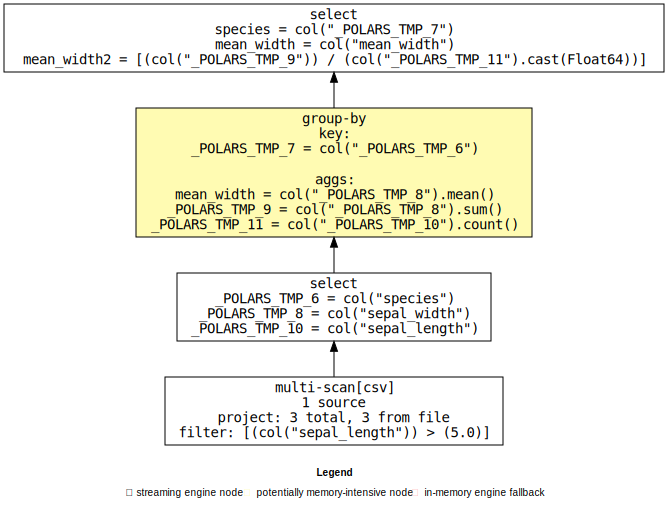

In [15]:
q1 = (
    pl.scan_csv("docs/assets/data/iris.csv")
    .filter(pl.col("sepal_length") > 5)
    .group_by("species")
    .agg(
        mean_width=pl.col("sepal_width").mean(),
        mean_width2=pl.col("sepal_width").sum() / pl.col("sepal_length").count(),
    )
    .show_graph(plan_stage="physical", engine="streaming")
)